<a href="https://colab.research.google.com/github/harshit-vmr/ML_Projects/blob/project_p1/SONAR%20Rock%20vs%20Mine%20Prediction/Rock_vs_mine_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Start of Code

###Import Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

###Data collection and Processing

In [2]:
sonar_data = pd.read_csv('/content/Copy of sonar data.csv', header=None) # as you can see in data there is no header

In [3]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
sonar_data.shape

(208, 61)

In [5]:
sonar_data.describe() #see the statistical measure of data

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
sonar_data[60].value_counts() # see numbers of rock and mine
sonar_data[60] = sonar_data[60].map({'M': 1, 'R': 0})

In [7]:
#separate input and label
X = sonar_data.drop(columns = 60, axis =1)
Y = sonar_data[60]

In [8]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [9]:
#normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

###Training and Test Data

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state=1)

In [11]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(208, 60)
(187, 60)
(21, 60)


### Model Training --- Logistic Regression

In [12]:
model = LogisticRegression()

In [13]:
#training model with train data
model.fit(X_train,Y_train)

LogisticRegression()

### Model Evaluation

In [14]:
#accuracy on training data
X_train_predict = model.predict(X_train)
training_data_accuracy = metrics.accuracy_score(X_train_predict, Y_train)

In [15]:
print('Accuracy on training data: '+ str(training_data_accuracy))

Accuracy on training data: 0.9197860962566845


In [16]:
print('Precision', metrics.precision_score(X_train_predict, Y_train))
print('Recall', metrics.recall_score(X_train_predict, Y_train))
print('F1 Score', metrics.f1_score(X_train_predict, Y_train))

Precision 0.93
Recall 0.9207920792079208
F1 Score 0.9253731343283582


In [17]:
#print loss (for classification it is log loss)
print(metrics.log_loss(Y_train, X_train_predict))

2.8912021435120714


In [18]:
#accuracy on test data
X_test_predict = model.predict(X_test)
test_data_accuracy = metrics.accuracy_score(X_test_predict, Y_test)

In [19]:
print('Accuracy on test data: '+ str(test_data_accuracy))
print('Precision', metrics.precision_score(X_test_predict, Y_test))
print('Recall', metrics.recall_score(X_test_predict, Y_test))
print('F1 Score', metrics.f1_score(X_test_predict, Y_test))

Accuracy on test data: 0.8095238095238095
Precision 0.7272727272727273
Recall 0.8888888888888888
F1 Score 0.7999999999999999


In [20]:
#print loss (for classification it is log loss)
print(metrics.log_loss(Y_test, X_test_predict))

6.865457788403267


In [21]:
print(X_test_predict)

[0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1]


In [22]:
print(Y_test)

104    1
188    1
72     0
79     0
149    1
12     0
174    1
37     0
173    1
167    1
99     1
75     0
118    1
172    1
64     0
5      0
103    1
16     0
1      0
9      0
182    1
Name: 60, dtype: int64


###Using different degree to find best model

In [23]:
def calculate_loss(degrees):
    train_loss = []
    test_loss = []
    for degree in degrees:
      print(degree)
      poly_features = PolynomialFeatures(degree=degree)
      X_train_poly = poly_features.fit_transform(X_train)
      X_test_poly = poly_features.transform(X_test)
      log_reg = LogisticRegression()
      log_reg.fit(X_train_poly, Y_train)
      y_train_pred = log_reg.predict(X_train_poly)
      loss = metrics.log_loss(Y_train, y_train_pred)
      train_loss.append(loss)
      y_test_pred = log_reg.predict(X_test_poly)
      loss = metrics.log_loss(Y_test, y_test_pred)
      test_loss.append(loss)
    return [train_loss,test_loss]

In [24]:
degree = [1,2,3,4]
losses = calculate_loss(degree)

1
2
3
4


In [25]:
print(losses[0])
print(losses[1])

[2.8912021435120714, 2.2204460492503136e-16, 2.2204460492503136e-16, 2.2204460492503136e-16]
[6.865457788403267, 12.014551129705715, 5.149093341302451, 5.149093341302451]


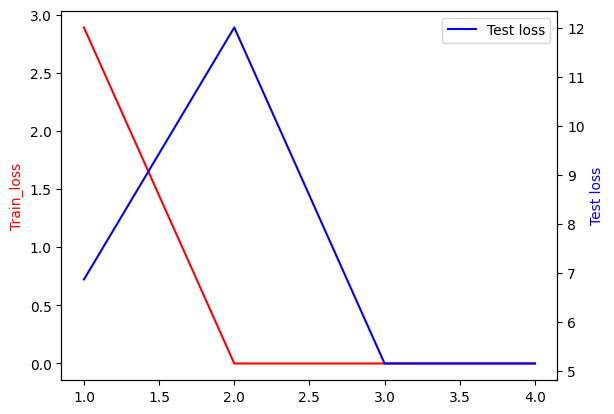

In [26]:
#plot
fig, ax1 = plt.subplots()

# Plot line 1
ax1.plot(degree, losses[0], label='Train loss', color='red')
ax1.set_ylabel('Train_loss', color='red')

# Create a second y-axis for line 2
ax2 = ax1.twinx()
ax2.plot(degree, losses[1], label='Test loss', color='blue')
ax2.set_ylabel('Test loss', color='blue')

# Add legend
plt.legend()

# Show the plot
plt.show()